# run_elmer

Run Elmer FEM from Python.

## Installation

```
pip install run_elmer
```

## Usage

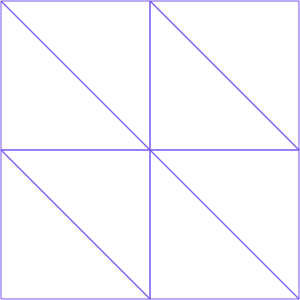

In [1]:
import run_elmer as elmer

m = elmer.mesh(
    [[0, 0],
     [0, 1],
     [1, 0],
     [1, 1]],
    [[0, 1, 2],
     [1, 2, 3]]
).refined()

m  # use in Elmer?

In [7]:
out = elmer.run(m, """
Header
  Mesh DB "." "."
End

Simulation
  Max Output Level = 5
  Coordinate System = Cartesian
  Simulation Type = Steady
  Output Intervals(1) = 1
  Steady State Max Iterations = 1
  Post File = "results.vtu"
End

Body 1
  Equation = 1
  Body Force = 1
End

Body Force 1 :: Source = Real 1.0
Equation 1 :: Active Solvers(1) = 1

Solver 1
  Equation = "Poisson"
  Variable = "Potential"
  Variable DOFs = 1
  Procedure = "Poisson" "PoissonSolver"
  Linear System Solver = "Direct"
  Linear System Direct Method = UMFPack
  Steady State Convergence Tolerance = 1e-09
End

Boundary Condition 1
  Target Boundaries(1) = 1
  Potential = Real 0
End
""", verbose=True)

Pulling from kinnala/elmer
Digest: sha256:2a19d445a8fa0d455ce2aa99355661fb7f80df497f82e0a161580efdfbafc7ff
Status: Image is up to date for ghcr.io/kinnala/elmer:devel-ba15974
cat mesh.header
9 8 8
2
303 8
202 8

cat mesh.nodes
1 -1 0.0 0.0 0.0
2 -1 0.0 1.0 0.0
3 -1 1.0 0.0 0.0
4 -1 1.0 1.0 0.0
5 -1 0.0 0.5 0.0
6 -1 0.5 0.0 0.0
7 -1 0.5 0.5 0.0
8 -1 0.5 1.0 0.0
9 -1 1.0 0.5 0.0

cat mesh.elements
1 1 303 1 5 6
2 1 303 2 7 8
3 1 303 2 5 7
4 1 303 3 7 9
5 1 303 3 6 7
6 1 303 4 8 9
7 1 303 5 6 7
8 1 303 7 8 9

cat mesh.boundary
1 1 1 0 202 1 5
2 1 1 0 202 1 6
3 1 3 0 202 2 5
4 1 2 0 202 2 8
5 1 5 0 202 3 6
6 1 4 0 202 3 9
7 1 6 0 202 4 8
8 1 6 0 202 4 9

ELMER SOLVER (v 9.0) STARTED AT: 2021/08/11 12:21:01
ParCommInit:  Initialize #PEs:            1
MAIN: 
MAIN: =============================================================
MAIN: ElmerSolver finite element software, Welcome!
MAIN: This program is free software licensed under (L)GPL
MAIN: Copyright 1st April 1995 - , CSC - IT Center for Scie

In [3]:
out.points

array([[0. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 1. , 0. ],
       [0. , 0.5, 0. ],
       [0.5, 0. , 0. ],
       [0.5, 0.5, 0. ],
       [0.5, 1. , 0. ],
       [1. , 0.5, 0. ]])

In [4]:
out.point_data

{'potential': array([[0.    ],
        [0.    ],
        [0.    ],
        [0.    ],
        [0.    ],
        [0.    ],
        [0.0625],
        [0.    ],
        [0.    ]])}

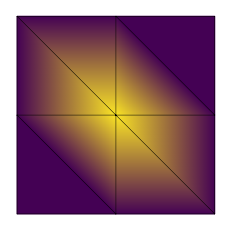

In [5]:
from skfem.visuals.matplotlib import plot, draw, show

ax = draw(m)
plot(m, out.point_data['potential'].flatten(), ax=ax, shading='gouraud')

In [6]:
from skfem.visuals.svg import plot